# Übergangswahrscheinlichkeiten Simulationsergebnisse
###  Bestimme relative Übergangswahrscheinlichkeiten vom Zustand Zuhause an Werktagen in Abhängigkeit des Zeitschrittes

### Zustände

* Zuhause -> 1
* Arbeit -> 2 
* Einkaufen -> 3 
* Freizeit -> 4
* Sonstiges -> 5

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pickle
import os

path = os.getcwd()+"\\Simulationsergebnisse\\Simulation_Results_3_250k.pickle"
df = pickle.load(open(path, 'rb'))

In [3]:
df.head()

,Trip_id,Trip_no,Whyfrom,Whyto,Departure,Departure_t,Arrival,Trip_duration,Distance,Stay_duration,Charge_start,Charge_end
0,0.1,1,1,5,618.0,41,619.0,1.0,0.4,10,NaN,NaN
1,0.2,2,5,3,629.0,42,660.0,31.0,9.7,142,NaN,NaN
2,0.3,3,3,4,802.0,53,989.0,187.0,59.2,1223,NaN,NaN
3,1.1,1,1,5,436.0,29,441.0,5.0,1.6,2,NaN,NaN
4,1.2,2,5,2,443.0,30,460.0,17.0,5.5,1226,NaN,NaN


In [4]:
df = df.rename(str.capitalize, axis='columns')

In [5]:
df.columns

Index(['Trip_id', 'Trip_no', 'Whyfrom', 'Whyto', 'Departure', 'Departure_t',
       'Arrival', 'Trip_duration', 'Distance', 'Stay_duration', 'Charge_start',
       'Charge_end'],
      dtype='object')

## Filtern nach Ausgangszuständen

In [6]:
zuhause = df[df["Whyfrom"]==1]

arbeit = df[df["Whyfrom"]==2]

einkaufen = df[df["Whyfrom"]==3]

freizeit = df[df["Whyfrom"]==4]

sonstiges = df[df["Whyfrom"]==5]


In [7]:
# Vernachlässige Rundreisen
zuhause = zuhause[zuhause["Whyto"] != 1]
arbeit = arbeit[arbeit["Whyto"] != 2]
einkaufen = einkaufen[einkaufen["Whyto"] != 3]
freizeit = freizeit[freizeit["Whyto"] != 4]
sonstiges = sonstiges[sonstiges["Whyto"] != 5]

## Gruppieren der Trips nach Zeitschritt des Wegbeginns

In [8]:
zuhause_grpd = zuhause.groupby(["Departure_t"])
arbeit_grpd = arbeit.groupby(["Departure_t"])
einkaufen_grpd = einkaufen.groupby(["Departure_t"])
freizeit_grpd = freizeit.groupby(["Departure_t"])
sonstiges_grpd = sonstiges.groupby(["Departure_t"])

## Zuordnen der relativen Übergangswahrscheinlichkeiten zu den anderen Zuständen in jedem Zeitschritt

In [9]:
zuhause_arbeit = [0 for i in range(97)]
zuhause_einkaufen = [0 for i in range(97)]
zuhause_freizeit = [0 for i in range(97)]
zuhause_sonstiges = [0 for i in range(97)]

arbeit_zuhause = [0 for i in range(97)]
arbeit_einkaufen = [0 for i in range(97)]
arbeit_freizeit = [0 for i in range(97)]
arbeit_sonstiges = [0 for i in range(97)]

einkaufen_arbeit = [0 for i in range(97)]
einkaufen_zuhause = [0 for i in range(97)]
einkaufen_freizeit = [0 for i in range(97)]
einkaufen_sonstiges = [0 for i in range(97)]

freizeit_arbeit = [0 for i in range(97)]
freizeit_einkaufen = [0 for i in range(97)]
freizeit_zuhause = [0 for i in range(97)]
freizeit_sonstiges = [0 for i in range(97)]

sonstiges_arbeit = [0 for i in range(97)]
sonstiges_einkaufen = [0 for i in range(97)]
sonstiges_freizeit = [0 for i in range(97)]
sonstiges_zuhause = [0 for i in range(97)]

In [10]:
# zähle relative Häufigkeit der Trips zum gegebenen Zustand in Zeitschritt t
for t, group in zuhause_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(2):
        zuhause_arbeit[t] = counts.get(2)
    if counts.get(3):
        zuhause_einkaufen[t] = counts.get(3)
    if counts.get(4):
        zuhause_freizeit[t] = counts.get(4)
    if counts.get(5):
        zuhause_sonstiges[t] = counts.get(5)

In [11]:
for t, group in arbeit_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        arbeit_zuhause[t] = counts.get(1)
    if counts.get(3):
        arbeit_einkaufen[t] = counts.get(3)
    if counts.get(4):
        arbeit_freizeit[t] = counts.get(4)
    if counts.get(5):
        arbeit_sonstiges[t] = counts.get(5)

In [12]:
for t, group in einkaufen_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        einkaufen_zuhause[t] = counts.get(1)
    if counts.get(2):
        einkaufen_arbeit[t] = counts.get(2)
    if counts.get(4):
        einkaufen_freizeit[t] = counts.get(4)
    if counts.get(5):
        einkaufen_sonstiges[t] = counts.get(5)

In [13]:
for t, group in freizeit_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        freizeit_zuhause[t] = counts.get(1)
    if counts.get(2):
        freizeit_arbeit[t] = counts.get(2)
    if counts.get(3):
        freizeit_einkaufen[t] = counts.get(3)
    if counts.get(5):
        freizeit_sonstiges[t] = counts.get(5)

In [14]:
for t, group in sonstiges_grpd:
    counts = group["Whyto"].value_counts(normalize=True)
    if counts.get(1):
        sonstiges_zuhause[t] = counts.get(1)
    if counts.get(2):
        sonstiges_arbeit[t] = counts.get(2)
    if counts.get(3):
        sonstiges_einkaufen[t] = counts.get(3)
    if counts.get(4):
        sonstiges_freizeit[t] = counts.get(4)

## Visualisierung

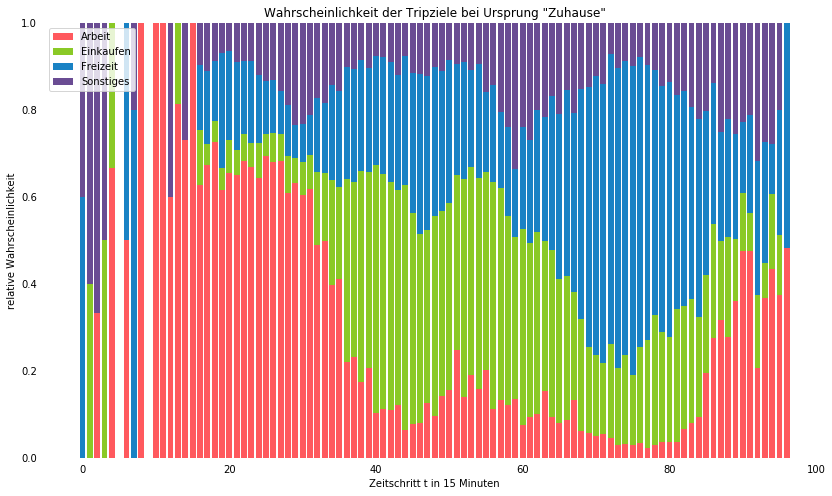

In [15]:
plt.figure(figsize=(14,8))
x = np.linspace(0,96, 97)
plt.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
plt.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
plt.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
plt.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
plt.xlabel("Zeitschritt t in 15 Minuten")
plt.ylabel("relative Wahrscheinlichkeit")
plt.box(on=None)
plt.title("Wahrscheinlichkeit der Tripziele bei Ursprung \"Zuhause\"");
plt.tick_params(top=False, bottom=False, left=False, right=False, labelbottom=True)
plt.legend();


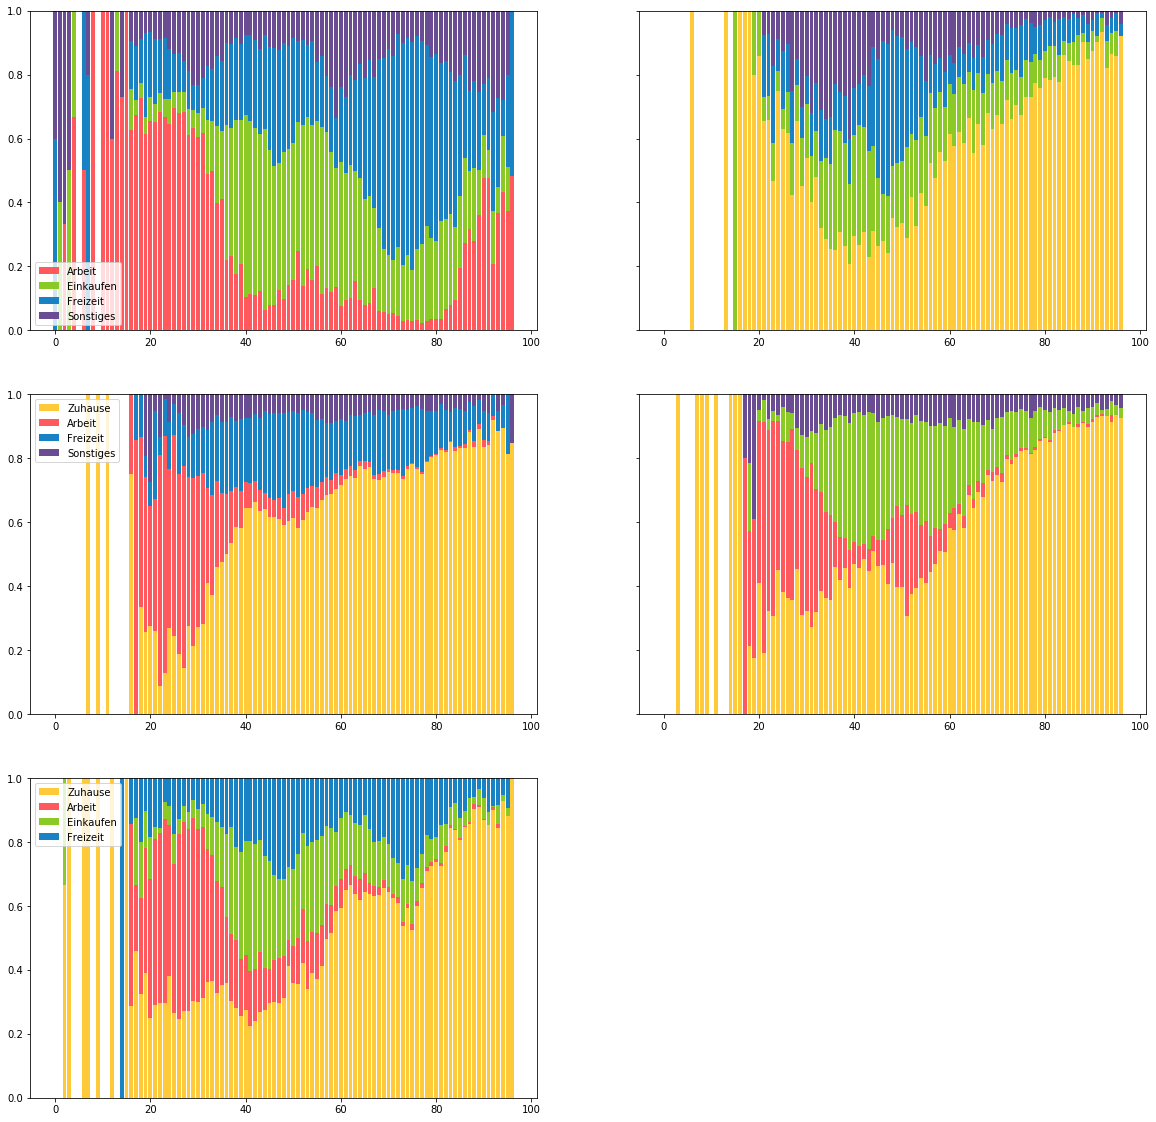

In [16]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(20,20), sharey=True)
x = np.linspace(0,96, 97)
ax1.bar(x, zuhause_arbeit, label="Arbeit", color='#FF595E');
ax1.bar(x, zuhause_einkaufen, bottom=zuhause_arbeit, label="Einkaufen", color='#8AC926');
ax1.bar(x, zuhause_freizeit, bottom=[i+j for i,j in zip(zuhause_arbeit,zuhause_einkaufen)], label="Freizeit", color='#1982C4');
ax1.bar(x, zuhause_sonstiges, bottom=[i+j+k for i,j,k in zip(zuhause_arbeit,zuhause_einkaufen,zuhause_freizeit)], label="Sonstiges", color='#6A4C93');
ax1.legend()

ax2.bar(x, arbeit_zuhause, label="Zuhause", color='#FFCA3A');
ax2.bar(x, arbeit_einkaufen, bottom=arbeit_zuhause, label="Einkaufen", color='#8AC926');
ax2.bar(x, arbeit_freizeit, bottom=[i+j for i,j in zip(arbeit_zuhause,arbeit_einkaufen)], label="Freizeit", color='#1982C4');
ax2.bar(x, arbeit_sonstiges, bottom=[i+j+k for i,j,k in zip(arbeit_zuhause,arbeit_einkaufen,arbeit_freizeit)], label="Sonstiges", color='#6A4C93')

ax3.bar(x, einkaufen_zuhause, label="Zuhause", color='#FFCA3A');
ax3.bar(x, einkaufen_arbeit, bottom=einkaufen_zuhause, label="Arbeit", color='#FF595E');
ax3.bar(x, einkaufen_freizeit, bottom=[i+j for i,j in zip(einkaufen_zuhause,einkaufen_arbeit)], label="Freizeit", color='#1982C4');
ax3.bar(x, einkaufen_sonstiges, bottom=[i+j+k for i,j,k in zip(einkaufen_zuhause,einkaufen_arbeit,einkaufen_freizeit)], label="Sonstiges", color='#6A4C93')
ax3.legend()

ax4.bar(x, freizeit_zuhause, label="Zuhause", color='#FFCA3A');
ax4.bar(x, freizeit_arbeit, bottom=freizeit_zuhause, label="Arbeit", color='#FF595E');
ax4.bar(x, freizeit_einkaufen, bottom=[i+j for i,j in zip(freizeit_zuhause,freizeit_arbeit)], label="Einkaufen", color='#8AC926');
ax4.bar(x, freizeit_sonstiges, bottom=[i+j+k for i,j,k in zip(freizeit_zuhause,freizeit_arbeit,freizeit_einkaufen)], label="Sonstiges", color='#6A4C93')

ax5.bar(x, sonstiges_zuhause, label="Zuhause", color='#FFCA3A');
ax5.bar(x, sonstiges_arbeit, bottom=sonstiges_zuhause, label="Arbeit", color='#FF595E');
ax5.bar(x, sonstiges_einkaufen, bottom=[i+j for i,j in zip(sonstiges_zuhause,sonstiges_arbeit)], label="Einkaufen", color='#8AC926');
ax5.bar(x, sonstiges_freizeit, bottom=[i+j+k for i,j,k in zip(sonstiges_zuhause,sonstiges_arbeit,sonstiges_einkaufen)], label="Freizeit", color='#1982C4')
ax5.legend()

fig.delaxes(ax6)

In [17]:
übergangswahrscheinlichkeiten_zuhause=[[i, j, k, l] for i,j,k,l in zip(zuhause_arbeit, zuhause_einkaufen, zuhause_freizeit, zuhause_sonstiges)]
übergangswahrscheinlichkeiten_arbeit=[[i, j, k, l] for i,j,k,l in zip(arbeit_zuhause, arbeit_einkaufen, arbeit_freizeit, arbeit_sonstiges)]
übergangswahrscheinlichkeiten_einkaufen=[[i, j, k, l] for i,j,k,l in zip(einkaufen_zuhause, einkaufen_arbeit, einkaufen_freizeit, einkaufen_sonstiges)]
übergangswahrscheinlichkeiten_freizeit=[[i, j, k, l] for i,j,k,l in zip(freizeit_zuhause, freizeit_arbeit, freizeit_einkaufen, freizeit_sonstiges)]
übergangswahrscheinlichkeiten_sonstiges=[[i, j, k, l] for i,j,k,l in zip(sonstiges_zuhause, sonstiges_arbeit, sonstiges_einkaufen, sonstiges_freizeit)]

übergangswahrscheinlichkeiten = [übergangswahrscheinlichkeiten_zuhause, übergangswahrscheinlichkeiten_arbeit, übergangswahrscheinlichkeiten_einkaufen, übergangswahrscheinlichkeiten_freizeit, übergangswahrscheinlichkeiten_sonstiges]

In [20]:
# teils keine Werte für Übergangswahrscheinlichkeiten in den frühen Stunden, da sehr wenig Fahrten in diesem Zeitraum stattfinden (0.005%) aller Fahrten
filt = df["Departure_t"] < 10
t_10 = df[filt]
len(t_10)/len(df)*100

0.005501013591014855